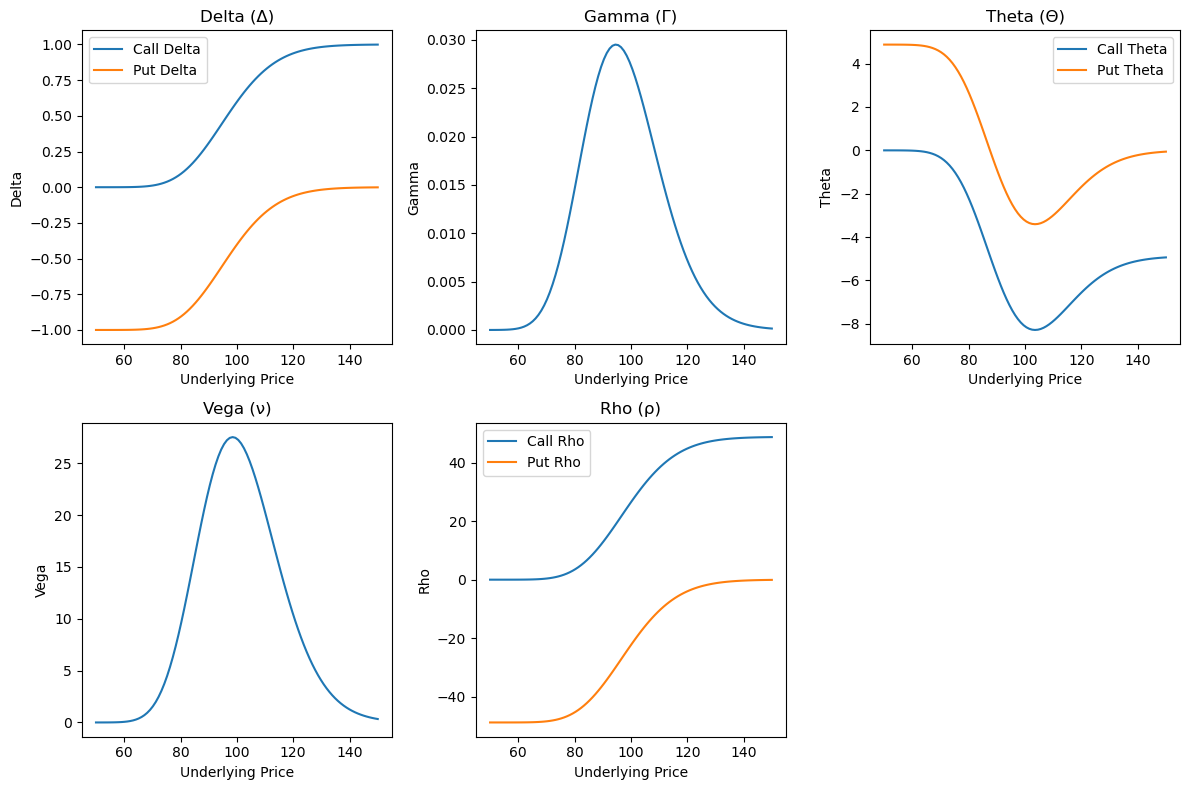

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes parameters
K = 100       # Strike price
T = 0.5       # Time to expiry (years)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility
S = np.linspace(50, 150, 100)  # Underlying price range

def black_scholes_greeks(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    # Delta
    delta_call = norm.cdf(d1)
    delta_put = delta_call - 1
    
    # Gamma (same for calls/puts)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    
    # Theta
    theta_call = (-(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))) - r * K * np.exp(-r*T) * norm.cdf(d2)
    theta_put = (-(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))) + r * K * np.exp(-r*T) * norm.cdf(-d2)
    
    # Vega (same for calls/puts)
    vega = S * np.sqrt(T) * norm.pdf(d1)
    
    # Rho
    rho_call = K * T * np.exp(-r*T) * norm.cdf(d2)
    rho_put = -K * T * np.exp(-r*T) * norm.cdf(-d2)
    
    return delta_call, delta_put, gamma, theta_call, theta_put, vega, rho_call, rho_put

delta_call, delta_put, gamma, theta_call, theta_put, vega, rho_call, rho_put = black_scholes_greeks(S, K, T, r, sigma)

# Plotting
plt.figure(figsize=(12, 8))

# Delta
plt.subplot(2, 3, 1)
plt.plot(S, delta_call, label='Call Delta')
plt.plot(S, delta_put, label='Put Delta')
plt.title('Delta (Δ)')
plt.xlabel('Underlying Price')
plt.ylabel('Delta')
plt.legend()

# Gamma
plt.subplot(2, 3, 2)
plt.plot(S, gamma)
plt.title('Gamma (Γ)')
plt.xlabel('Underlying Price')
plt.ylabel('Gamma')

# Theta
plt.subplot(2, 3, 3)
plt.plot(S, theta_call, label='Call Theta')
plt.plot(S, theta_put, label='Put Theta')
plt.title('Theta (Θ)')
plt.xlabel('Underlying Price')
plt.ylabel('Theta')
plt.legend()

# Vega
plt.subplot(2, 3, 4)
plt.plot(S, vega)
plt.title('Vega (ν)')
plt.xlabel('Underlying Price')
plt.ylabel('Vega')

# Rho
plt.subplot(2, 3, 5)
plt.plot(S, rho_call, label='Call Rho')
plt.plot(S, rho_put, label='Put Rho')
plt.title('Rho (ρ)')
plt.xlabel('Underlying Price')
plt.ylabel('Rho')
plt.legend()

plt.tight_layout()
plt.show()